# Chuẩn hóa dữ liệu và Xử lý giá trị ngoại lai

In [1]:
import pandas as pd
import numpy as np
import re
import ast
import matplotlib.pyplot as plt
import seaborn as sns
# Hiển thị toàn bộ dòng không bị rút gọn
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('updated_data.csv', encoding='utf-8-sig')

In [3]:
# Kiểm tra số cột và dòng của dữ liệu
print(data.shape)

(11872, 23)


In [4]:
# Kiểm tra tên các cột của dữ liệu
print(data.columns)

Index(['name', 'brand', 'color', 'condition', 'price_old', 'price_new',
       'image', 'warranty', 'CPU', 'RAM', 'capacity', 'time', 'battery',
       'screen_size', 'operating_system', 'display_technology',
       'screen_resolution', 'SIM', 'size', 'weight', 'bluetooth',
       'refresh_rate', 'GPU'],
      dtype='object')


In [5]:
# Kiểu dữ liệu của thuộc tính
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11872 entries, 0 to 11871
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                11872 non-null  object 
 1   brand               11572 non-null  object 
 2   color               11871 non-null  object 
 3   condition           11837 non-null  object 
 4   price_old           11872 non-null  object 
 5   price_new           11846 non-null  object 
 6   image               11872 non-null  object 
 7   warranty            11550 non-null  object 
 8   CPU                 11739 non-null  object 
 9   RAM                 11756 non-null  object 
 10  capacity            11852 non-null  object 
 11  time                11813 non-null  object 
 12  battery             11872 non-null  object 
 13  screen_size         11872 non-null  object 
 14  operating_system    10542 non-null  object 
 15  display_technology  11575 non-null  object 
 16  scre

### Xử lí price_old, price_new

In [6]:
# Chuyển đổi cột 'price_old' từ object sang Int64, giữ nguyên NaN
data['price_old'] = data['price_old'].astype(str).str.replace('.', '', regex=False)
data['price_old'] = data['price_old'].str.replace('₫', '', regex=False)
data['price_old'] = data['price_old'].str.replace('đ', '', regex=False)
data['price_old'] = pd.to_numeric(data['price_old'], errors='coerce').astype('Int64')

# Chuyển đổi cột 'price_new' từ object sang Int64, giữ nguyên NaN
data['price_new'] = data['price_new'].astype(str).str.replace('.', '', regex=False)
data['price_new'] = data['price_new'].str.replace('₫', '', regex=False)
data['price_new'] = data['price_new'].str.replace('đ', '', regex=False)
data['price_new'] = pd.to_numeric(data['price_new'], errors='coerce').astype('Int64')

## Xử lí brand

In [7]:
print(data['brand'].unique())

['iPhone' 'OPPO' 'Samsung' 'Apple' 'vivo' 'realme' 'Xiaomi' 'Vivo' 'Điện'
 'Nubia' 'Realme' 'Nothing' 'Tecno' 'Infinix' 'TECNO' 'ASUS' 'POCO' 'Itel'
 'Oppo' 'Nokia' 'OnePlus' 'INOI' 'Meizu' 'Viettel' 'Masstel' 'Samsung.'
 'HONOR.' 'Mobell.' 'Xiaomi.' 'iPhone (Apple).' 'OPPO.' 'Nokia.'
 'Masstel.' 'realme.' 'vivo.' 'Itel.' nan]


In [8]:
# Xử lí cột 'brand'
data['brand'] = data['name'].str.split(' ').str[0]
data.loc[data['brand'] == 'iPhone', 'brand'] = 'iPhone (Apple)'

## Xử lí cột color và image

In [9]:
print(data['color'].unique())

["['Bạc', 'Tím', 'Đen', 'Vàng']"
 "['Bạc', 'Xám', 'Xanh dương', 'Vàng', 'Xanh lá']"
 "['Hồng', 'Vàng', 'Đen']" "['Bạc', 'Đen', 'Vàng', 'Tím']"
 "['Tím', 'Đen', 'Vàng', 'Xám']"
 "['Xanh dương', 'Tím', 'Đen', 'Xám', 'Vàng', 'Xanh Lục', 'Cam']"
 "['Đen', 'Vàng', 'Tím', 'Bạc']"
 "['Xanh lá', 'Bạc', 'Xám', 'Vàng', 'Xanh dương']"
 "['Tím', 'Đen', 'Vàng', 'Bạc']"
 "['Bạc', 'Xanh lá', 'Xám', 'Vàng', 'Xanh']"
 "['Hồng', 'Đen', 'Xanh dương', 'Xanh lá', 'Vàng']"
 "['Xanh lá', 'Tím', 'Đen', 'Kem', 'Xanh', 'Đỏ', 'Xám']" "['Đen', 'Xanh']"
 "['Vàng', 'Đen']" "['Tím', 'Xám', 'Vàng', 'Đen']"
 "['Titan Xanh', 'Titan Trắng', 'Titan Tự nhiên', 'Titan Đen']"
 "['Titan Trắng', 'Titan Đen', 'Titan Xanh', 'Titan Tự Nhiên']"
 "['Đen', 'Xanh', 'Tím', 'Kem']" "['Xanh dương', 'Hồng']"
 "['Trắng', 'Xanh', 'Tím', 'Đỏ', 'Đen', 'Vàng']"
 "['Xám', 'Gold', 'Đỏ', 'Bạc']"
 "['Titan Trắng', 'Titan Tự Nhiên', 'Titan Xanh', 'Titan Đen']"
 "['Vàng', 'Bạc', 'Đen', 'Tím']"
 "['Titan Tự Nhiên', 'Titan Trắng', 'Titan Xanh', 'Tit

In [10]:
print(data['image'].unique())

["['https://cellphones.com.vn/iphone-14-pro-max-cu-tray-xuoc.html?product_id=64176', 'https://cellphones.com.vn/iphone-14-pro-max-cu-tray-xuoc.html?product_id=61437', 'https://cellphones.com.vn/iphone-14-pro-max-cu-tray-xuoc.html?product_id=60045', 'https://cellphones.com.vn/iphone-14-pro-max-cu-tray-xuoc.html?product_id=57572']"
 "['https://cellphones.com.vn/iphone-13-pro-max-128gb-cu-tray-xuoc.html?product_id=55443', 'https://cellphones.com.vn/iphone-13-pro-max-128gb-cu-tray-xuoc.html?product_id=51283', 'https://cellphones.com.vn/iphone-13-pro-max-128gb-cu-tray-xuoc.html?product_id=48422', 'https://cellphones.com.vn/iphone-13-pro-max-128gb-cu-tray-xuoc.html?product_id=47724', 'https://cellphones.com.vn/iphone-13-pro-max-128gb-cu-tray-xuoc.html?product_id=48951']"
 "['https://cellphones.com.vn/oppo-find-n3-flip-12gb-256gb-cu-dep.html?product_id=83124', 'https://cellphones.com.vn/oppo-find-n3-flip-12gb-256gb-cu-dep.html?product_id=76930', 'https://cellphones.com.vn/oppo-find-n3-flip-12

Với dữ liệu lấy từ cellphones thì color và image là một list gồm nhiều màu và ảnh khác nhau -> Xử lí cột 'color' và 'image' bằng cách: với mỗi màu trong 1 mẫu điện thoại tạo một dòng dữ liệu mới kèm với hình ảnh tương ứng.  
Với dữ liệu lấy từ thế giới di động, loại bỏ chuỗi "Màu: "

In [11]:
# Loại bỏ chuỗi "Màu: " trong cột 'color'
data['color'] = data['color'].str.replace('Màu: ', '', regex=False)

In [12]:
# Xử lý cột 'color' và 'image': với mỗi màu trong 1 mẫu điện thoại tạo một dòng dữ liệu mới kèm với hình ảnh tương ứng

# Khởi tạo các cột mới để lưu các list đã parse
data['parsed_color_list'] = [[] for _ in range(len(data))]
data['parsed_image_list'] = [[] for _ in range(len(data))]

# Tiền xử lý image
data['image'] = data['image'].str.replace('https://img.tgdd.vn/imgt/old/f_webp,fit_outside,quality_75/', '', regex=False)

for index, row in data.iterrows():
    # Xử lý cột 'color'
    color_str = str(row['color']).strip()
    
    if color_str.lower() in ['', 'nan', 'none']:
        parsed_colors = []
    elif color_str.startswith('[') and color_str.endswith(']'):
        parsed_list = ast.literal_eval(color_str)
        if isinstance(parsed_list, list):
            cleaned_colors = [str(c).strip() for c in parsed_list if str(c).strip() != '']
            parsed_colors = cleaned_colors
        else:
            parsed_colors = []
    else:
        parsed_colors = [c.strip() for c in color_str.split(',') if c.strip() != '']
    data.at[index, 'parsed_color_list'] = parsed_colors

    # Xử lý cột 'image'
    img_url_str = str(row['image']).strip()

    if img_url_str.lower() in ['', 'nan', 'none']:
        parsed_images = []
    elif img_url_str.startswith('[') and img_url_str.endswith(']'):
        parsed_list = ast.literal_eval(img_url_str)
        if isinstance(parsed_list, list):
            cleaned_urls = [str(u).strip() for u in parsed_list if str(u).strip() != '']
            parsed_images = cleaned_urls
        else:
            parsed_images = []
    else:
        urls = [u.strip() for u in img_url_str.split(',') if u.strip() != '']
        parsed_images = urls
    data.at[index, 'parsed_image_list'] = parsed_images

# Tạo một cột tạm thời chứa các list of tuples
data['color_image_list_of_tuples'] = [[] for _ in range(len(data))]

for index, row in data.iterrows():
    colors = row['parsed_color_list']
    images = row['parsed_image_list']
    
    len_colors = len(colors)
    len_images = len(images)

    if len_colors == 0 and len_images == 0:
        data.at[index, 'color_image_list_of_tuples'] = [(np.nan, np.nan)]
    # Nếu chỉ có màu, điền NaN cho ảnh
    elif len_colors > 0 and len_images == 0:
        data.at[index, 'color_image_list_of_tuples'] = [(color, np.nan) for color in colors]
    # Nếu chỉ có ảnh, điền NaN cho màu
    elif len_images > 0 and len_colors == 0:
        data.at[index, 'color_image_list_of_tuples'] = [(np.nan, image) for image in images]
    # Độ dài không khớp:
    else:
        max_len = max(len_colors, len_images)
        temp_tuples = []
        for i in range(max_len):
            color_val = colors[i] if i < len_colors else np.nan
            image_val = images[i] if i < len_images else np.nan
            temp_tuples.append((color_val, image_val))
        data.at[index, 'color_image_list_of_tuples'] = temp_tuples

# Explode cột chứa list các tuple
data_exploded = data.explode('color_image_list_of_tuples')

# Loại bỏ các cột không cần thiết
data_exploded = data_exploded.drop(columns=[
    'image',
    'color',
    'parsed_color_list',
    'parsed_image_list',
], errors='ignore')

# Tạo các cột 'color' và 'image' mới từ cột tuple đã explode
data_exploded['color'] = data_exploded['color_image_list_of_tuples'].apply(lambda x: x[0])
data_exploded['image'] = data_exploded['color_image_list_of_tuples'].apply(lambda x: x[1])
data_exploded = data_exploded.drop(columns='color_image_list_of_tuples')
data = data_exploded.copy()

## Xử lí cột condition

In [13]:
print(data['condition'].unique())

['Cũ Trầy Xước' 'Cũ trầy xước' 'Cũ Đẹp' 'Cũ Xước Cấn' 'Cũ đẹp'
 'Hàng trưng bày' nan '256GB)' 'Đã Kích Hoạt' 'Đã kích hoạt'
 'Chính hãng (VN/A) Đã kích hoạt' 'Cũ xước cấn' 'đã kích hoạt'
 'Cũ Trầy xước' 'Đã kích hoạt bảo hành VN/A' '128GB)' '512GB)'
 'Có trầy xước']


Cần thống nhất nội dung trong thuộc tính

In [14]:
condition_normalization_map = {
    'cũ trầy xước': 'Cũ trầy xước',
    'cũ xước cấn': 'Cũ trầy xước cấn',
    'cũ đẹp': 'Cũ đẹp',
    'hàng trưng bày': 'Hàng trưng bày',
    'đã kích hoạt': 'Đã kích hoạt',
    'chính hãng (vn/a) đã kích hoạt': 'Đã kích hoạt (Chính Hãng VN/A)',
    'đã kích hoạt bảo hành vn/a': 'Đã kích hoạt (Bảo Hành VN/A)',
    'đổi bảo hành': 'Đổi bảo hành',
    'đổi bảo hành (vn/a)': 'Đổi Bảo Hành (VN/A)',
    'đổi bảo hành vn/a': 'Đổi Bảo Hành (VN/A)',
    'xước cấn': 'Cũ trầy xước cấn',
    'cũ': 'Cũ',
    'chính hãng đã kích hoạt': 'Đã kích hoạt (Chính Hãng)',
    '256gb)': 'Cũ',
    '512gb)': 'Cũ',
    '128gb)': 'Cũ',
    'có trầy xước': 'Cũ trầy xước'
}
condition = data['condition']
data['condition'] = data['condition'].astype(str).str.lower()
data['condition'] = data['condition'].map(condition_normalization_map) 
data['condition'] = data['condition'].fillna(condition)
data['condition'] = data['condition'].str.strip()

In [15]:
print(data['condition'].unique())

['Cũ trầy xước' 'Cũ đẹp' 'Cũ trầy xước cấn' 'Hàng trưng bày' nan 'Cũ'
 'Đã kích hoạt' 'Đã kích hoạt (Chính Hãng VN/A)'
 'Đã kích hoạt (Bảo Hành VN/A)']


# Xử lí cột time

In [16]:
print(data['time'].unique())

['09/2022' '09/2021' '10/2023' '1/2024' '09/2023' 'Feb 17, 2023' '2023'
 '9/2023' '09/2024' '11/2019' 'Sep 22, 2017' 'Feb 25, 2022' 'Sep 21, 2018'
 'Nov 13, 2020' '7/2023' 'Sep 16, 2016' '03/2024' 'Oct 23, 2020' nan
 '9/2024' '03/2025' 'Nov 03, 2017' '5/2023' '10/2020' 'Mar 18, 2022'
 'Dec 14, 2022' 'Aug 26, 2022' 'Oct 30, 2024' '2024' 'Jan 11, 2022'
 'Sep 24, 2021' 'Apr 22, 2022' '02/2024' '07/2024' '02-2025' '03/2023'
 'Dec 23, 2022' 'October 2019' '05/2023' 'Oct 26, 2018' '01/2024'
 'Mar 05, 2024' 'Apr 18, 2022' 'Apr 01, 2022' 'Aug 21, 2020' '11/2024'
 'Aug 26, 2021' '01/2025' '12/2023' '07/2023' 'Jun 21, 2023'
 'Jan 29, 2021' '03/2022' 'Mar 14, 2022' '06/2023' '04/2024'
 'Oct 02, 2020' 'Aug 03, 2024' 'Aug 27, 2021' '11/2023' '07/2022'
 'Dec 31, 2021' '08/2024' '10/2022' 'Jul 13, 2022' 'Oct 06, 2022'
 '04/2025' '04/2023' 'Feb 16, 2023' 'Sep 26, 2024' '6/2023' '06/2024'
 'May 12, 2020' 'Jul 24, 2024' '08/2022' '8/2023' 'Feb 09, 2022' '02/2023'
 'Jan 12, 2023' 'Dec 21, 2020' '07//2024

Cần thống nhất sang kiểu ngày/ tháng/ năm

In [17]:
def convert_date(date_str):
    try:
        date_obj = pd.to_datetime(date_str, errors='coerce', dayfirst=True)
        if pd.isna(date_obj):
            return date_str  
        return date_obj.strftime("%d/%m/%Y") 
    except Exception as e:
        return str(e)
    
data['time'] = data['time'].apply(convert_date)
data['time'] = pd.to_datetime(data['time'], format="%d/%m/%Y", errors='coerce')


In [18]:
print(data['time'].unique())

<DatetimeArray>
['2022-09-01 00:00:00', '2021-09-01 00:00:00', '2023-10-01 00:00:00',
 '2024-01-01 00:00:00', '2023-09-01 00:00:00', '2023-02-17 00:00:00',
 '2023-01-01 00:00:00', '2024-09-01 00:00:00', '2019-11-01 00:00:00',
 '2017-09-22 00:00:00', '2022-02-25 00:00:00', '2018-09-21 00:00:00',
 '2020-11-13 00:00:00', '2023-07-01 00:00:00', '2016-09-16 00:00:00',
 '2024-03-01 00:00:00', '2020-10-23 00:00:00',                 'NaT',
 '2025-03-01 00:00:00', '2017-11-03 00:00:00', '2023-05-01 00:00:00',
 '2020-10-01 00:00:00', '2022-03-18 00:00:00', '2022-12-14 00:00:00',
 '2022-08-26 00:00:00', '2024-10-30 00:00:00', '2022-01-11 00:00:00',
 '2021-09-24 00:00:00', '2022-04-22 00:00:00', '2024-02-01 00:00:00',
 '2024-07-01 00:00:00', '2025-02-01 00:00:00', '2023-03-01 00:00:00',
 '2022-12-23 00:00:00', '2019-10-01 00:00:00', '2018-10-26 00:00:00',
 '2024-03-05 00:00:00', '2022-04-18 00:00:00', '2022-04-01 00:00:00',
 '2020-08-21 00:00:00', '2024-11-01 00:00:00', '2021-08-26 00:00:00',
 '20

# Xử lí cột CPU

In [19]:
print(data['CPU'].unique())

['Apple A16 Bionic 6-core' 'Apple A15' 'MediaTek Dimensity 9200'
 'Exynos 2400' 'Snapdragon 8 Gen 3 For Galaxy' 'Apple A16 Bionic 6 nhân'
 'Apple A16 Bionic' 'Snapdragon 8 Gen 2 (4 nm)'
 'Qualcomm Snapdragon 680, tối đa 2.4GHz' 'Snapdragon 8 Gen 2 8 nhân'
 'A17 Pro' 'Snapdragon 8 Gen 2 for Galaxy' 'Apple A18' 'A13 Bionic'
 'Apple A11 Bionic APL1W72' 'Qualcomm Snapdragon 8 Gen 1 (4 nm)'
 'Apple A12 Bionic 6 nhân' 'Apple A14 Bionic (5 nm)'
 'Snapdragon 8 Gen 2 for Galaxy (4nm) 8 nhân' 'Apple A10 Fusion APL1W24'
 'Qualcomm Snapdragon 7 Gen 1 (4 nm)' 'Apple A15 Bionic' 'Apple A18 Pro'
 'Exynos 1380' 'Helio G85' 'UNISOC T612' 'MediaTek Dimensity 7025 - Ultra'
 'Mediatek MT8781 Helio G99 (6nm)' 'Exynos 1580' 'Snapdragon 8 Gen 2'
 'Apple A13 Bionic (7 nm+)' 'Chip Snapdragon® 8 thế hệ thứ 2'
 'Exynos 1480 4nm 2.4GHz' 'Snapdragon 8 Plus Gen 1'
 'MediaTek Dimensity 9400' 'Dimensity 8300-Ultra' 'Exynos 2100 (5nm)'
 'Snapdragon 778G 5G 8 nhân' 'Snapdragon 8 Gen 3' 'Exynos 2400e (4nm)'
 'Exynos 220

Cần loại bỏ các thông tin không cần thiết, sửa lỗi chính tả.

In [20]:
cpu = data['CPU']
data['CPU'] = data['CPU'].fillna('')
data['CPU'] = data['CPU'].str.split(',').str[0].str.strip()
data['CPU'] = data['CPU'].str.replace(r'\s*\(.*?\)\s*', ' ', regex=True)
data['CPU'] = data['CPU'].str.replace(r'[^\w\s\+\.]', ' ', regex=True)
data['CPU'] = data['CPU'].str.replace(r'\s+', ' ', regex=True).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\bQualcomm\s+SM\d+\s*', '', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\b(thế hệ|gen|GEN)\b', 'Gen', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\bcore\b', 'nhân', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\bQualcomm\s*', '', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\bthứ\s*', '', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\bMobile\s+Platform\s*', '', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\b(dành cho|For)\b', 'for', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'^\s*(?:Chip|Mật độ)\s*', '', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\s*(?:\d+\s*nm\+?|tăng)\s*.*$', '', regex=True, flags=re.IGNORECASE).str.strip()
data['CPU'] = data['CPU'].str.replace(r'\bnapdragon\b', 'Snapdragon', regex=True, flags=re.IGNORECASE).str.strip()

cleaned_cpus = []
for cpu_entry in data['CPU']:
    if pd.isna(cpu_entry) or cpu_entry == '':
        cleaned_cpus.append(np.nan)
        continue

    final_cpu_name = re.sub(r'(Gen)(\d+)', r'\1 \2', str(cpu_entry), flags=re.IGNORECASE)
    cleaned_cpus.append(final_cpu_name.strip())

data['CPU'] = cleaned_cpus
data['CPU'] = data['CPU'].fillna(cpu)

In [21]:
# Chuẩn hóa chỉ giữ lại tên chip, không giữ lại các thuộc tính phụ
data['CPU'] = data['CPU'].str.lower().str.strip()
data['CPU'] = data['CPU'].str.replace(r'\b\d+\s*nhân\b', '', regex=True)
data['CPU'] = data['CPU'].str.replace(r'\b(for galaxy|ultimate|ultra|pro|plus|max|energy|l|e|5g)\b', '', regex=True)
data['CPU'] = data['CPU'].str.replace(r'\s+', ' ', regex=True).str.strip()
data['CPU'] = data['CPU'].str.title()

In [22]:
print(data['CPU'].unique())

['Apple A16 Bionic' 'Apple A15' 'Mediatek Dimensity 9200' 'Exynos 2400'
 'Snapdragon 8 Gen 3' 'Snapdragon 8 Gen 2' 'Snapdragon 680' 'A17'
 'Apple A18' 'A13 Bionic' 'Apple A11 Bionic Apl1W72' 'Snapdragon 8 Gen 1'
 'Apple A12 Bionic' 'Apple A14 Bionic' 'Apple A10 Fusion Apl1W24'
 'Snapdragon 7 Gen 1' 'Apple A15 Bionic' 'Exynos 1380' 'Helio G85'
 'Unisoc T612' 'Mediatek Dimensity 7025' 'Mediatek Mt8781 Helio G99'
 'Exynos 1580' 'Apple A13 Bionic' 'Exynos 1480' 'Mediatek Dimensity 9400'
 'Dimensity 8300' 'Exynos 2100' 'Snapdragon 778G' 'Exynos 2400E'
 'Exynos 2200' nan 'Unisoc T820' 'Snapdragon 8 Elite' 'Snapdragon 6 Gen 3'
 'Snapdragon 7S Gen 3' 'Mediatek 9000+' 'Helio G88' 'Snapdragon Sm6225'
 'Snapdragon 8+ Gen 1' 'Dimensity 6300' 'Dimensity 8200'
 'Mediatek Dimensity 7050' 'Mediatek Helio G99' 'Mediatek Dimensity 7200'
 'Mediatek G99' 'Dimensity 7300' 'Mediatek Dimensity 920'
 'Mediatek Helio G100' 'Exynos 1280' 'Exynos 990'
 'Mediatek Dimensity 6300' 'Snapdragon 888+' 'Mediatek G100'


# Xử lí cột warranty

In [23]:
print(data['warranty'].unique())

['6 tháng' nan '12 tháng' '1 tháng tại TGDĐ' 'Chính hãng đến 14/09/2025'
 'Chính hãng đến 28/10/2025' 'Chính hãng đến 14/12/2025'
 'Chính hãng đến 13/12/2025' 'Chính hãng đến 08/12/2025'
 'Chính hãng đến 30/12/2025' 'Chính hãng đến 31/12/2025'
 'Chính hãng đến 13/01/2026' 'Chính hãng đến 05/01/2026'
 'Chính hãng đến 26/01/2026' 'Chính hãng đến 24/01/2026'
 'Chính hãng đến 25/01/2026' 'Chính hãng đến 10/02/2026'
 'Chính hãng đến 28/02/2026' 'Chính hãng đến 01/03/2026'
 'Chính hãng đến 16/03/2026' 'Chính hãng đến 12/04/2026'
 'Chính hãng đến 29/04/2026' 'Chính hãng đến 22/02/2026'
 'Chính hãng đến 17/07/2026' 'Chính hãng đến 27/02/2026'
 'Chính hãng đến 09/08/2025' 'Chính hãng đến 16/08/2025'
 'Chính hãng đến 23/08/2025' 'Chính hãng đến 23/07/2025'
 'Chính hãng đến 15/08/2025' 'Chính hãng đến 17/08/2025'
 'Chính hãng đến 04/08/2025' 'Chính hãng đến 30/07/2025'
 'Chính hãng đến 31/08/2025' 'Chính hãng đến 20/08/2025'
 'Chính hãng đến 03/08/2025' 'Chính hãng đến 22/07/2025'
 'Chính hãng đế

Cần loại bỏ các chuỗi không cần thiết trong cột warranty

In [24]:
data['warranty'] = data['warranty'].str.replace(' tại TGDĐ', '', regex=False)
data['warranty'] = data['warranty'].str.replace('Chính hãng đến ', '', regex=False)

# Xử lí cột battery

In [25]:
print(data['battery'].unique())

['4.352 mAh' '4,325mAh' 'Li-Po 4300 mAh' '4,900mAh' '5,000mAh'
 'Công nghệ sạc Sạc nhanh 20W Sạc không dây MagSafe 15WSạc không dây Qi 7,5WCổng sạc Lightning'
 'Công nghệ sạc Sạc nhanh Sạc MagSafe lên đến 15WCổng sạc Lightning'
 'Công nghệ sạc Sạc nhanhSạc không dây MagSafe lên đến 15WSạc không dây Qi lên đến 7,5WCổng sạc USB Type-C'
 '5.000mAh' '5000 mAh' '4805 mAh'
 'Công nghệ sạc Sạc nhanhSạc không dây 15WSạc không dây Qi 7.5WCổng sạc USB Type-C'
 '3900 mAh'
 'Công nghệ sạc Sạc không dây lên đến 25W Sạc không dây Qi2 lên đến 15WSạc không dây Qi lên đến 7,5WCổng sạc USB Type-C'
 '3110 mAh' 'Li-ion 2691 mAh' 'Li-Ion 5000 mAh' 'Li-ion'
 'Li-Ion, sạc nhanh 20W, sạc không dây 15W, USB Power Delivery 2.0'
 '4400 mAh' 'Li-ion 2900 mAh' '3,279mAh'
 'Công nghệ sạc Sạc không dây MagSafe lên đến 25W với bộ tiếp hợp 30W trở lênSạc không dây Qi2 lên đến 15WSạc không dây Qi lên đến 7,5WCổng sạc USB Type-C'
 'Cổng sạc USB Type-C'
 'Công nghệ sạc Sạc nhanh 20WSạc không dây chuẩn Magsafe 15wSạc khôn

Dữ liệu trong cột battery không thống nhất theo đơn vị mAh và loại bỏ thông tin không cần thiết

## Với dữ liệu từ thế giới di động

In [26]:
# Thống nhất dữ liệu trong cột 'battery' sang mAh
condition = data['battery'] == '27 giờ'
data.loc[condition, 'battery'] = '4674 mAh'
condition = data['battery'] == '26 giờ'
data.loc[condition, 'battery'] = '4005 mAh'
condition = data['battery'] == '22 giờ'
data.loc[condition, 'battery'] = '3561 mAh'
condition = data['battery'] == '33 giờ'
data.loc[condition, 'battery'] = '4685 mAh'

## Với dữ liệu từ cellphones

In [27]:
# Thống nhất dữ liệu trong cột 'battery' sang mAh
data['battery'] = data['battery'].fillna('').astype(str).str.lower()
data['battery'] = data['battery'].str.replace(r'\s+', '', regex=True)
data['battery'] = data['battery'].str.replace(r'[,.]', '', regex=True)
extracted_mah = data['battery'].str.extract(r'(\d+)mah', flags=re.IGNORECASE, expand=False)
data['battery'] = pd.to_numeric(extracted_mah, errors='coerce')

# Lọc các sản phẩm có 'battery' là NaN sau chuyển đổi
products_with_nan_battery = data[data['battery'].isna()]
unique_names_with_nan_battery = products_with_nan_battery['name'].unique()
# In ra name của các sản phẩm đó
if unique_names_with_nan_battery.size > 0:
    print("\nSản phẩm có giá trị pin (mAh) là NaN:")
    for name in unique_names_with_nan_battery:
        print(f"- {name}")
else:
    print("\nKhông có sản phẩm nào có giá trị pin (mAh) là NaN.")


Sản phẩm có giá trị pin (mAh) là NaN:
- iPhone 14 Pro Max
- iPhone 14 Pro
- iPhone 15 Plus
- iPhone 15 Pro
- iPhone 15 Pro Max
- iPhone 16 Plus
- iPhone XS Max
- iPhone 12 Pro Max
- iPhone 16 Pro Max
- iPhone 15
- iPhone 14 Plus
- iPhone 12 Pro
- iPhone 16 Pro
- iPhone 16
- iPhone 12
- iPhone XS
- iPhone 12 mini
- iPhone 13
- iPhone 14
- Xiaomi Poco X7 Pro 5G


In [28]:

# Điền các trị NaN
lookup_data = {
    'product_name_lookup': ['iPhone 14 Pro Max', 'iPhone 14 Pro', 'iPhone 15 Plus', 'iPhone 15 Pro',
                            'iPhone 15 Pro Max', 'iPhone 16 Plus', 'iPhone XS Max', 'iPhone 12 Pro Max',
                            'iPhone 16 Pro Max', 'iPhone 15', 'iPhone 14 Plus', 'iPhone 12 Pro', 
                            'iPhone 12', 'iPhone 16 Pro', 'iPhone 16', 'iPhone XS', 'iPhone 12 mini',
                            'iPhone 13', 'realme 9i', 'iPhone 14', 'OPPO Reno 13 5G',
                            'Xiaomi Redmi Note 14', 'Sony Xperia 10V', 'OPPO Reno13 Pro',
                            'Xiaomi Poco X7 Pro 5G', 'Xiaomi Redmi 10C 4G', 'Xiaomi Redmi Note 14 Pro',
                            'Xiaomi Mi 11T'],
    'correct_battery': [4323, 3200, 4383, 3274, 4422, 4674, 3174, 3687, 4685, 3349, 4325, 2815, 2815,
                       4674, 3561, 2658, 2227, 3240, 5000, 3279, 5600, 5500, 5000, 5800, 6000, 5000,
                       5500, 5000]
}
lookup = pd.DataFrame(lookup_data)

battery_map = lookup.set_index('product_name_lookup')['correct_battery']
data['battery'] = data['battery'].fillna(data['name'].map(battery_map))

# Xử lí cột RAM và capacity

In [29]:
print(data['RAM'].unique())

['6 GB' '12 GB' '8 GB' '16 GB' '4 GB' '3 GB' '4GB (LPDDR4)' '3GB (LPDDR4)'
 '6GB (LPDDR4)' '2GB (LPDDR4)' '3GB' '8GB + Mở rộng 8GB' '2 GB'
 '4GB + Mở rộng 4GB' nan '48MB' '48 MB' '64 MB' '16 MB']


Dữ liệu trong cột RAM không thống nhất theo đơn vị GB.

In [30]:
print(data['capacity'].unique())

['128 GB' '256 GB' '512 GB' '64 GB' '32 GB' '1 TB' '16 GB' nan '128 MB'
 '16 MB']


Dữ liệu theo cột capacity không thống nhất theo đơn vị GB.

In [31]:
# 1. Chuẩn hóa cột RAM: lấy phần trước "mở rộng" nếu có
data['RAM'] = data['RAM'].apply(lambda x: (
    f"{re.search(r'(\d+)\s*+', str(x).lower().split('mở rộng')[0]).group(1)} GB"
    if isinstance(x, str) and 'mở rộng' in x.lower() and re.search(r'(\d+)\s*+', x.lower().split('mở rộng')[0])
    else x
))

# 2. Hàm convert sang số GB
def convert_to_gb(value):
    if pd.isna(value) or str(value).lower().strip() == 'nan':
        return np.nan
    value = str(value).upper().strip()
    if 'GB' in value:
        try:
            return float(value.replace('GB', '').strip())
        except ValueError:
            return np.nan
    elif 'MB' in value:
        try:
            return float(value.replace('MB', '').strip()) / 1024
        except ValueError:
            return np.nan
    elif 'TB' in value:
        try:
            return float(value.replace('TB', '').strip()) * 1024
        except ValueError:
            return np.nan
    else:
        return np.nan

# 3. Áp dụng convert_to_gb cho cột RAM và capacity
data['RAM'] = data['RAM'].apply(convert_to_gb)
data['capacity'] = data['capacity'].apply(convert_to_gb)

# Xử lí cột screen size

In [32]:
print(data['screen_size'].unique())

['6.7 inches' '6.8 inches' '6.1 inches' '6.4 inches' '7.82 inches'
 '5.5 inches' '6.5 inches' '7.6 inches' '6.9 inches' '6.6 inches'
 '6.56 inches' '6.3 inches' '6.74 inches' '6.67 inches' '5.4 inches'
 '5.8 inches' '4.7 inches' '6.62 inches' '6.36 inches' '6.59 inches'
 '6.72 inches' '6.73 inches' '6.78 inches' '6.66 inches' '6.2 inches'
 '6.55 inches' '6.10 x 2.68 x 0.33 inches\r\n(155 x 68 x 8.3 mm)'
 '6.79 inches' '6.64 inches' '6.28 inches' '6.88 inches' '6.52 inches'
 '6.44 inches' '6.53 inches' '2.0 inches' '6.51 inches' '6.75 inches'
 '2.4 inches' '6.745 inches' '8.12 inches' 'Chính 6.7" & Phụ 3.4"' '6.56"'
 '1.77"' '6.2"' '6.4"' '6.7"' '6.8"' '6.6"' '6.5"' 'Chính 7.6" & Phụ 6.3"'
 '6.73"' '6.1"' '1.8"' '6.36"' '2"' '6.67"' '6.79"' '6.71"' '6.88 "'
 '6.43"' '6.72"' '2.4"' '6.74"' '2.31"' '6.68 "' '6.9"' '6.64"' '2.8"'
 '6.745 "' 'Chính 6.8" & Phụ 3.26"' '5.4"' '6.78"' '6.3"' '6.59"' '6.83"'
 '6.77 "' '6.51"' '6.44"' '3"'
 '6.37 x 2.90 x 0.31 inches\r\n(161.9 x 73.7 x 7.8 mm)' '

Cần loại bỏ inches và ", chỉ lấy kích thước màn hình chính

In [33]:
data['screen_size'] = data['screen_size'].apply(
    lambda x: x.split('&')[0].split('Chính')[1].strip() 
    if isinstance(x, str) and 'Chính' in x and len(x.split('Chính')) > 1
    else x if isinstance(x, str) else None
)

data['screen_size'] = data['screen_size'].apply(lambda x: (
    float(re.search(r'(\d+\.?\d*)', str(x)).group(1))
    if isinstance(x, str) and re.search(r'(\d+\.?\d*)', str(x))
    else None
))

# Xử lý cột screen resolution

In [34]:
print(data['screen_resolution'].unique())

['2796 x 1290-pixel' '2778 x 1284 pixel' '1080 x 2520 pixels'
 '3120 x 1440 pixels (Quad HD+)' '1440 x 3120 pixels' '2556 x 1179 pixels'
 '1440 x 3088 pixels (QHD+)' '1080 x 2400 pixels (FullHD+)'
 '2268 x 2440 pixels' '1080 x 2340 pixels (FullHD+)' '1792 x 828 pixel'
 '1080 x 1920 pixels (FullHD)' '1242 x 2688 pixel' '1284 x 2778 pixels'
 '2176 x 1812 pixels (QXGA+)' '2532 x 1170 pixels' '2868 x 1320 pixels'
 '1170 x 2532 pixels' '1612 × 720 pixel' '2622 x 1206  pixels'
 '1600 x 720 pixels (HD+)' '2436 x 1125 pixels' '1125 x 2436 pixels'
 '750 x 1334 pixels' '1334 x 750 pixels (HD+)'
 '2176x1812px, 6:5 ratio, 373 PPI' '1256 x 2760 pixels'
 '1220 x 2712 pixels' '1612x720 (HD+)' '2688 x 1242 pixels'
 '2160 x 1856 (QXGA+)' '1080 x 2640 pixels' '2712 x 1220 pixels'
 '2340x1080px, 19.5:9 ratio, 403 PPI' '2640x1080px, 22:9 ratio, 426 PPI'
 '3200 x 1440 pixel' 'Full HD+ (1080 x 2400 Pixels)' nan
 '1080 x 2412 pixels' '1080 x 2436 pixels' 'Full HD+ (1080 x 2412 Pixels)'
 '2340 x 1080-pixel' '

Cần loại bỏ thông tin không cần thiết, tách cột

In [35]:
# Xử lí thông tin độ phân giải trong cột 'screen_resolution'
data['screen_resolution_temp'] = data['screen_resolution'].apply(
    lambda x: (
        None if not isinstance(x, str) else
        re.match(r"^(?:Chính:\s*)?(.*?)(?:\s*(?:[xX&|]\s*|,\s*)?Phụ:.*)?$", str(x)).group(1).strip()
    )
)

data['screen_resolution_temp'] = data['screen_resolution_temp'].apply(
    lambda x: None if x == 'nan' else x
)

data['screen_resolution_temp'] = data['screen_resolution_temp'].apply(
    lambda x: (
        re.search(r'(\d+)\s*[xX×]\s*(\d+)', str(x)).group(0)
        if isinstance(x, str) and re.search(r'(\d+)\s*[xX×]\s*(\d+)', str(x))
        else None
    )
)

# Tách cột 'screen_resolution' thành 'resolution_width' và 'resolution_height'
data[['resolution_width', 'resolution_height']] = data['screen_resolution_temp'].str.extract(r'(\d+(?:\.\d+)?)\s*[xX×]\s*(\d+(?:\.\d+)?)')

# Chuyển đổi cột 'resolution_width' sang kiểu số
data['resolution_width'] = data['resolution_width'].astype(str)
data['resolution_width'] = pd.to_numeric(data['resolution_width'], errors='coerce')

# Chuyển đổi cột 'resolution_height' sang kiểu số
data['resolution_height'] = data['resolution_height'].astype(str)
data['resolution_height'] = pd.to_numeric(data['resolution_height'], errors='coerce')

# Xóa các cột không cần thiết.
data = data.drop(columns=['screen_resolution_temp'])
data.drop(columns=['screen_resolution'], inplace=True)


# Xử lý cột operating system

In [36]:
print(data['operating_system'].unique())

['iOS 16' 'iOS15' 'Android 13' 'Android 14, One UI 6.1' 'iOS 17'
 'Android 13, One UI 5' 'ColorOS 13.1.1, nền tảng Android 13'
 'Android (14, 13), One UI' 'iOS 18'
 'iOS 13 hoặc cao hơn (Tùy vào phiên bản phát hành)' '11'
 'Android 12, One UI 4.1' '12'
 'iOS 14.1 hoặc cao hơn (Tùy vào phiên bản phát hành)' 'Android 14'
 'iOS 15' 'Xiaomi HyperOS' 'iOS' 'Funtouch OS 13' 'Android' 'iOS 13'
 'MIUI 14, Android 13' 'Android 12, One UI 4.1.1'
 'ColorOS 15, nền tảng Android 15' 'Android (14, 13, 12), One UI' nan
 'Android 17' 'Android (10, 9.0 Pie), Samsung One UI' 'Xiaomi HyperOS 2'
 'iOS 12' 'Android 13, One UI 5.1' 'XOS 14' 'Android 11, MIUI 12.5'
 'Android 15' 'Android 12, MIUI 14'
 'ColorOS 14 Android 14  - Thuật toán tối ưu hiệu năng'
 'Android 12, One UI 4' 'Android 10, One UI 2.1' 'Android 11'
 'Android (13)' 'Android 11, One UI 3.0' 'Android 11, One UI 3.1'
 'Android 12' 'ColorOS 12.1,  Android 12' 'Android 16'
 'Android 10, One UI 2.5' 'ColorOS 13.1'
 'ColorOS 12.1, nền tảng Android 

In [37]:
data.loc[data['operating_system'] == '11', 'operating_system'] = 'iOS 11'
data.loc[data['operating_system'] == '12', 'operating_system'] = 'iOS 12'
# Loại bỏ phần sau dấu phẩy trong cột 'operating_system'
data['operating_system'] = data['operating_system'].str.split(',').str[0].str.strip()

In [38]:
# Loại bỏ các chữ thừa, chỉ giữ lại tên và phiên bản
data['operating_system'] = data['operating_system'].str.extract(
    r'(iOS ?\d+(?:\.\d+)?|Android(?:™)? ?\d+(?:\.\d+)?|Android ?[UT]|Android ?\d+ ?Go|MIUI ?\d+(?:\.\d+)?|ColorOS ?\d+(?:\.\d+)?|Funtouch OS ?\d+(?:\.\d+)?|realme UI ?[\w\.]+|HarmonyOS ?\d+(?:\.\d+)?|Xiaomi HyperOS ?\d*|Mocor ?\(RTOS\)|XOS ?\d+(?:\.\d+)?|OxygenOS|One UI ?\d+(?:\.\d+)?|EMUI ?\d+(?:\.\d+)?|Series ?30\+|S30\+)',
    flags=re.IGNORECASE
)
data['operating_system'] = data['operating_system'].apply(
    lambda x: (
        re.match(r'^([A-Za-z]+(?: [A-Za-z]+)*)(?:\s?(\d+\.?\w*))?', 
                 re.sub(r'(Android)(\d)', r'\1 \2',
                 re.sub(r'(iOS)(\d)', r'\1 \2',
                 re.sub(r'\s+', ' ', re.sub(r'[™®]', '', x.strip())))))
        .group(0).strip()
        if isinstance(x, str) and re.match(r'^([A-Za-z]+(?: [A-Za-z]+)*)(?:\s?(\d+\.?\w*))?', x)
        else x
    )
)

# Xử lý cột SIM

In [39]:
print(data['SIM'].unique())

['2 SIM (nano‑SIM và eSIM)' '2 SIM (Nano-SIM)'
 'SIM 1 + SIM 2 / SIM 1 + eSIM / 2 eSIM' '2 Nano-SIM + eSIM'
 'Nano-SIM + eSIM' 'Sim kép (nano-Sim và e-Sim) - Hỗ trợ 2 e-Sim'
 'Nano-SIM' '2 Nano-SIM' 'Dual nano-SIM hoặc 1 nano-SIM + 1 eSIM'
 'Nano SIM, eSIM' '2 Nano SIM hoặc 1 Nano SIM + 1 eSIM'
 '2 Nano SIM hoặc 1 Nano + 1 eSIM' nan 'Nano SIM' '2 Nano SIM'
 '2 Nano SIM (Sim 2 chung khe với thẻ nhớ)' '1 Nano SIM & 1 eSIM'
 '1 Nano SIM + 1 eSIM hoặc 2 eSIM'
 '2 Nano SIM hoặc 2 eSIM hoặc 1 Nano SIM + 1 eSIM'
 '2 Nano SIM (SIM 2 chung khe thẻ nhớ)' '2 Nano SIM + 1 eSIM'
 '2 Micro SIM']


In [40]:
# Xử lí thông tin cột 'SIM'
data['processed_SIM'] = data['SIM'].astype(str).str.lower()
data['processed_SIM'] = data['processed_SIM'].replace('nan', np.nan)

# Tạo cột 'has_nano_sim' (nếu có là 1 - không có là 0)
data['has_nano_sim'] = data['processed_SIM'].str.contains(r'nano[-]?sim', case=False, na=np.nan).astype(float)

# Tạo cột 'has_esim' (nếu có là 1 - không có là 0)
data['has_esim'] = data['processed_SIM'].str.contains(r'e[-]?sim', case=False, na=np.nan).astype(float)

# Cập nhật regex để bắt 'SIM' hoặc 'SIM 1', 'SIM 2',
mask_generic_sim = (
    data['processed_SIM'].notna() &
    data['processed_SIM'].str.contains(r'\bSIM(?: \d+| vật lý)?\b', case=False, na=False)
)

data = data.drop(columns = 'processed_SIM')

# Cập nhật has_nano_sim thành 1.0 cho các trường hợp này
data.loc[mask_generic_sim, 'has_nano_sim'] = 1.0

data.drop(columns=['SIM'], inplace=True)

# Xử lý cột display technology

In [41]:
print(data['display_technology'].unique())

['Super Retina XDR OLED' 'OLED' 'AMOLED' 'Dynamic AMOLED'
 'Dynamic AMOLED 2X' 'IPS LCD'
 'Cảm ứng điện dung LED-backlit IPS LCD, 16 triệu màu' 'Super Retina OLED'
 'Super AMOLED Plus' 'Super AMOLED' 'Super Retina XDR'
 'Retina IPS LCD capacitive touchscreen, 16M colors, Wide color gamut, True-tone, 625 nits max brightness'
 'Liquid Retina' 'Liquid Retina LCD' 'Flexible AMOLED On-cell' 'LCD' nan
 'TFT LCD' 'LED-backlit IPS LCD, HD' 'LTPO AMOLED'
 'Super Retina XDR OLED, HDR10, Dolby Vision, Wide color gamut, True-tone'
 'PLS LCD' 'Fluid AMOLED'
 'Liquid Retina IPS LCD capacitive touchscreen, 16M colors'
 'Dynamic AMOLED QHD+ Infinity-O' 'LTPS LCD' 'TN']


Cần loại bỏ các thông tin không cần thiết 

In [42]:
display_info = data['display_technology']
data['display_technology'] = data['display_technology'].fillna('').astype(str)
data['display_technology'] = data['display_technology'].str.extract(r'(.*?lcd)', flags=re.IGNORECASE, expand=False)
data['display_technology'] = data['display_technology'].fillna(display_info)
data['display_technology'] = data['display_technology'].str.split(',').str[0]
data['display_technology'] = data['display_technology'].str.replace('Cảm ứng điện dung ', '', regex=False)
data['display_technology'] = data['display_technology'].str.strip()

# Xử lý cột size

In [43]:
print(data['size'].unique())

['160.7 x 77.6 x 7.9 mm' '160.8 x 78.1 x 7.65mm'
 'Khi mở: 166.42 x 75.78 x 7.79 mm Khi gập: 85.54 x 75.78 x 16.45 mm'
 '158.5 x 75.9 x 7.75mm' '162.3 x 79.0 x 8.6mm'
 'Dài 174.5mm - Ngang: 71.5mm - Dày 7.85mm' '160,9 x 77,8 x 7,80 mm'
 '163.4 x 78.1 x 8.9 mm'
 'Đen: 160 x 73.23 x 7.93 mm  Xanh: 160 x 73.23 x 7.99 mm'
 'Màu Vàng Khi mở: 153.4 x 143.1 x 5.9 (màn hình ngoài)/5.8 (mặt lưng) mm Khi gập: 153.4 x 73.3 x 11.7 mm  Màu Đen Khi mở: 153.4 x 143.1 x 5.9 (màn hình ngoài)/6.0 (mặt lưng) mm Khi gập: 153.4 x 73.3 x 11.9 mm"'
 '146,6 x 70,6 x 8,25 mm' '159,9 x 76,7 x 8,25 mm' '146.3 x 70.9 x 7.6 mm'
 '150.9mm - 75.7mm - 8.3mm'
 '158.4 x 78.1 x 7.5 mm (6.24 x 3.07 x 0.30 in)' '163.3 x 77.9 x 8.9 mm'
 '157.5 - 77.4 - 7.7 mm' '160.8 x 78.1 x 7.4 mm'
 'Mở: 154.9 x 129.9 x 6.1mm Gập: 154.9 x 67.1 x 13.4mm'
 '158.2 x 77.9 x 7.3 mm (6.23 x 3.07 x 0.29 in)' '163.9 x 76.5 x 7.8 mm'
 '146.7 x 71.5 x 7.80mm' '163 x 77,6 x 8,25 mm' '147.6 x 71.6 x 7.80 mm'
 'Dọc 160.8 x Ngang 78.1 x Dày 7.8mm' '14

Chỉ lấy kích thước, tạo ra các cột mới lưu thông tin dài, rộng, cao

In [44]:
# Tạo một bản sao để xử lý cột 'size'
data['size_cleaned'] = data['size'].astype(str).str.lower()

# Ưu tiên lấy kích thước khi mở
data['size_cleaned'] = data['size_cleaned'].apply(
    lambda x: re.search(r'(\d+(?:\.\d+)?\s*(?:x|×|\*|\s+)\s*\d+(?:\.\d+)?\s*(?:x|×|\*|\s+)\s*\d+(?:\.\d+)?)', x).group(1)
    if re.search(r'(\d+(?:\.\d+)?\s*(?:x|×|\*|\s+)\s*\d+(?:\.\d+)?\s*(?:x|×|\*|\s+)\s*\d+(?:\.\d+)?)', x) else x
)

# Loại bỏ các thông tin trong ngoặc đơn, tên màu sắc, tên bản, v.v.
data['size_cleaned'] = data['size_cleaned'].str.replace(r'\(.*?\)', '', regex=True)
data['size_cleaned'] = data['size_cleaned'].str.replace(r'(?:màu\s*\w+|\w+\s*(?:đỏ|xanh|tím|đen|vàng|trắng|kem|bạc).*?:\s*|bản\s*\w+:\s*|pha lê đen:)', '', regex=True)
data['size_cleaned'] = data['size_cleaned'].str.replace(r'khi gập.*|kích thước gập.*|kích thước khi gập lại.*', '', regex=True)

# Loại bỏ các từ khóa mô tả kích thước và đơn vị
data['size_cleaned'] = data['size_cleaned'].str.replace(r'(?:dài|ngang|rộng|cao|độ dày|dày|mm|cm|in|g|inch|\'|")\s*', '', regex=True)
data['size_cleaned'] = data['size_cleaned'].str.replace(':', '', regex=False)
data['size_cleaned'] = data['size_cleaned'].str.replace('~', '', regex=False)
data['size_cleaned'] = data['size_cleaned'].str.replace('≈', '', regex=False)
data['size_cleaned'] = data['size_cleaned'].str.replace(r'\s*[x×*]\s*', ' ', regex=True)
data['size_cleaned'] = data['size_cleaned'].str.replace('-', ' ', regex=False)
data['size_cleaned'] = data['size_cleaned'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Trích xuất các số và chuyển đổi thành float
data['size_cleaned'] = data['size_cleaned'].apply(
    lambda x: ' '.join(re.findall(r'\d+(?:\.\d+)?', x)[:3]) if re.findall(r'\d+(?:\.\d+)?', x) else x
)
pattern_3_nums = r'(\d+(?:\.\d+)?)\s+(\d+(?:\.\d+)?)\s+(\d+(?:\.\d+)?)'

extracted_dims = data['size_cleaned'].str.extract(pattern_3_nums)

data['val1'] = pd.to_numeric(extracted_dims[0], errors='coerce')
data['val2'] = pd.to_numeric(extracted_dims[1], errors='coerce')
data['val3'] = pd.to_numeric(extracted_dims[2], errors='coerce')

# Sắp xếp và gán vào height, width, depth
data['temp_dims'] = data[['val1', 'val2', 'val3']].values.tolist()

# Hàm sắp xếp
data['temp_dims'] = data['temp_dims'].apply(
    lambda x: sorted([val for val in x if pd.notna(val)], reverse=True) if isinstance(x, list) else []
)

# Gán giá trị sau khi sắp xếp
data['height'] = data['temp_dims'].apply(lambda x: x[0] if len(x) > 0 else np.nan)
data['width'] = data['temp_dims'].apply(lambda x: x[1] if len(x) > 1 else np.nan)
data['depth'] = data['temp_dims'].apply(lambda x: x[2] if len(x) > 2 else np.nan)

# Tìm các hàng mà height, width, depth đều là NaN (chưa được xử lý)và size_cleaned chỉ chứa một số duy nhất
single_num_mask = (data['height'].isna()) & (data['width'].isna()) & (data['depth'].isna())

# Trích xuất giá trị duy nhất này (nếu có)
data['single_val'] = data['size_cleaned'].apply(
    lambda x: float(re.findall(r'\d+(?:\.\d+)?', x)[0])
    if re.findall(r'\d+(?:\.\d+)?', x) and len(re.findall(r'\d+(?:\.\d+)?', x)) == 1
    else np.nan
)

for index, row in data.iterrows():
    # Gán vào height (nếu single_val > 150 và height là NaN)
    if row['single_val'] > 150 and pd.isna(row['height']):
        data.at[index, 'height'] = row['single_val']
    if 50 < row['single_val'] <= 150 and pd.isna(row['width']):
         data.at[index, 'width'] = row['single_val']
    if row['single_val'] <= 50 and pd.isna(row['depth']):
        data.at[index, 'depth'] = row['single_val']

# Loại bỏ cột tạm
data = data.drop(columns=['single_val', 'val1', 'val2', 'val3', 'size_cleaned', 'temp_dims'])

# Chuyển đổi kiểu dữ liệu
data['height'] = data['height'].fillna(pd.NA).astype(float)
data['width'] = data['width'].fillna(pd.NA).astype(float)
data['depth'] = data['depth'].fillna(pd.NA).astype(float)

data = data.drop(columns = ['size'])

# Xử lý cột GPU

In [45]:
print(data['GPU'].unique())

['Apple GPU (5-core graphics)' 'GPU 5 nhân' 'Immortalis-G715 MC11'
 'Adreno 750' 'Adreno 750 (1 GHz)' 'Apple GPU 5 nhân' 'GPU 5 lõi'
 'Adreno 740' 'Adreno 610' 'GPU 6 nhân mới' 'GPU 5 lõi mới'
 'Apple GPU (4-core graphics)' 'Apple GPU (3 lõi đồ họa)' 'Adreno 730'
 'Apple GPU 4 nhân' 'PowerVR Series7XT Plus (6 lõi đồ họa)' 'Adreno 644'
 '5‑core GPU' 'GPU 6 lõi mới' '5 nhân GPU' 'GPU 4 nhân' 'Mali-G68 MP5'
 'Mali-G52 MC2' 'Mali-G57' 'IMG BXM-8-256' 'Mali-G57 MC2'
 'AMD Ariel 2WGP-1RB 1.3 GHz' 'GPU Qualcomm® Adreno™' 'AMD Titan 1WGP'
 'Adreno 670' 'Immortalis G925 MC12' 'Mali G615' 'Adreno 660'
 'Apple GPU 4-core' 'Adreno 650' 'Xclipse 940' 'Xclipse 920' nan
 'Adreno 830' 'Adreno 710' 'Qualcomm® Adreno™ GPU' 'Mali-G710 MC10'
 'Mali-G52' 'Mali-G72 MP3' 'Adreno GPU' 'ARM Mail-G68 MC4' '8 lõi'
 'Mali-G610 MC4' 'Mali-G57 3D Graphics' 'Mali-G615' 'Mali-G68 MC4'
 'Mali-G68' 'ARM MAli-G57' 'Mali-G77 MP11' 'Adreno 619'
 'Arm Mali-G78, 14 nhân' 'Mali-G78 MP14' 'Adreno™ 730 @818MHz'
 'Mali-G77 MC9'

Loại bỏ các thông tin không cần thiết, sửa lỗi chính tả, chỉ giữ lại tên chip GPU

In [46]:
data['GPU'] = data['GPU'].fillna('Unknown')

# Xoá ký tự đặc biệt, chuẩn hoá khoảng trắng, xoá từ khoá mô tả
data['GPU'] = (data['GPU']
               .str.replace(r'[^\w\s\+\.\-]', ' ', regex=True)
               .str.replace(r'\s+', ' ', regex=True).str.strip()
               .str.replace(r'\b(Qualcomm|Graphics|đồ họa|mới|up to)\b', '', regex=True, flags=re.IGNORECASE)
               .str.strip())

# Đổi "core", "lõi" thành "nhân"
data['GPU'] = data['GPU'].str.replace(r'(\d+)\s*(?:lõi|core)s?\b', r'\1 nhân', regex=True, flags=re.IGNORECASE)

# Ghép từ tách rời và định dạng lại Adreno
data['GPU'] = (data['GPU']
               .str.replace(r'\b(Mali|G|MC|MP|Adreno|IMG|GE|Series|XT|Plus|Apple|PowerVR|Arm|ARM|Immortalis|Xclipse)\s+([A-Za-z0-9]+)', r'\1-\2', regex=True)
               .str.replace(r'\bAdreno(?:\s*\bGPU\b)?\s*(\d+)\b', r'Adreno-\1', regex=True, flags=re.IGNORECASE))

# Loại bỏ tần số MHz, GHz
data['GPU'] = data['GPU'].str.replace(r'\s*\d+\s*(mhz|ghz)', '', regex=True, flags=re.IGNORECASE).str.strip()

# Chuẩn hóa ARM Mali và sửa lỗi
data['GPU'] = (data['GPU']
               .str.replace(r'arm[-\s]*mali', 'ARM-Mali', regex=True, flags=re.IGNORECASE)
               .str.replace(r'\bMail\b', 'Mali', regex=True, flags=re.IGNORECASE)
               .str.replace(r'ARM[-\s]*Mail', 'ARM-Mali', regex=True, flags=re.IGNORECASE))

# Chuẩn hóa GPU không chuẩn
data.loc[data['GPU'].str.lower().str.contains('gpu adreno', na=False), 'GPU'] = 'Adreno-Unknown'
data.loc[data['GPU'].str.lower().str.contains('adreno gpu', na=False), 'GPU'] = 'Adreno-Unknown'

# Xử lý chuỗi GPU dạng "GPU X nhân"
for n in [4, 5, 6]:
    data.loc[data['GPU'].str.match(fr'gpu\s*{n}\s*nhân', na=False, case=False), 'GPU'] = f'Apple-GPU {n} nhân'

# Các chuỗi lộn xộn hoặc không phải GPU
non_gpu_patterns = ['SM-A146B', 'SM-A146P', 'Cortex', 'đang câ p nhâ t', 'hãng không công bố', 'unknown', 'amd', 'mt676']
pattern_no_gpu = '|'.join(non_gpu_patterns)
data.loc[data['GPU'].str.lower().str.contains(pattern_no_gpu, na=False), 'GPU'] = 'Unknown'

# Đồng nhất định dạng và gộp alias
data['GPU'] = data['GPU'].str.replace(r'ARM-Mali\s+', 'ARM-Mali-', regex=True)
alias_map = {'GPU 5 nhân': 'Apple-GPU 5 nhân', '5 nhân GPU': 'Apple-GPU 5 nhân', 'Apple-GPU 5-core': 'Apple-GPU 5 nhân',
             'Apple-GPU 4-core': 'Apple-GPU 4 nhân', 'Adreno-750 1 GHz': 'Adreno-750',
             'Mali-G57 MC2 950MHz': 'Mali-G57 MC2', 'IMG-GE8320 680 MHz': 'PowerVR-GE8320'}
data['GPU'] = data['GPU'].replace(alias_map)


# Xử lý cột bluetooth

In [47]:
print(data['bluetooth'].unique())

['v5.3, A2DP, LE' 'v5.0' 'v5.3, A2DP, LE, aptX HD' 'Bluetooth 5.3' '5.3'
 'A2DP, LE, v5.3' 'v5.3' '5.3, A2DP, LE' '5.0' '5.0, A2DP, LE'
 '5.2, A2DP, LE' 'LE, A2DP, v5.0' '4.2, A2DP, LE' 'v5.2, A2DP, LE'
 'v5.0, A2DP, LE' 'Bluetooth 5.0' 'v5.2' '5.2, A2DP, LE, aptX HD'
 '5.4 BLE' 'v5.4, A2DP, LE' nan 'Có' 'v5.4' '5.4' '5.1, A2DP, LE'
 'Bluetooth 6.0' 'Bluetooth v5.4' 'A2DPLEv5.2' 'BT 5.4'
 'v5.2, A2DP, LE, aptX HD, LHDC' '5.0, A2DP, LE, aptX' '5.2' 'BT5.4' '5.1'
 '5.1, A2DP, LE5.2, A2DP, LE' 'A2DP, LE' 'A2DP, LE, v4.2'
 'v5.2, A2DP, LE, aptX HD' 'v5.1' 'v 5.0' 'Có 5.0, A2DP, LE'
 '5.2, A2DP, LE, aptX HD, aptX Adaptive' '4.2, A2DP' 'v5.3 BLE' 'BT 5.2'
 'v5,2' 'v5.1 BLE' 'Bluetooth\t5.0, BLE' '5.0, A2DP, LE, EDR'
 'v5.1, A2DP, LE' '5.0, A2DP, LE, aptX HD' 'v 52' 'LE, apt-X, A2DP, v5.0'
 'v5.3, LE, A2DP' 'v5.2, LE, A2DP' 'v4.2' 'v5.0, A2DP' 'v2.1'
 'v5.3, LE, apt-X, A2DP' 'v5.0, LE, A2DP' 'v6.0' 'LE, A2DP'
 'v5.0, apt-X, LE']


Loại bỏ thông tin không cần thiết

In [48]:
# Chuẩn hóa chuỗi và sửa lỗi chính tả
data['processed_bluetooth'] = data['bluetooth'].fillna('').astype(str)

data['processed_bluetooth'] = data['processed_bluetooth'].str.replace(r'(\d+),(\d+)', r'\1.\2', regex=True)  # Thay dấu phẩy thành dấu chấm
data['processed_bluetooth'] = data['processed_bluetooth'].str.replace(r'\bv\s*(\d+\.\d+)', r'v\1', regex=True, flags=re.IGNORECASE).str.strip()  # Thêm v vào phiên bản
data['processed_bluetooth'] = data['processed_bluetooth'].str.replace(r'(?<!Dual[\s\-])\bBluetooth\b\s*', '', regex=True).str.strip()  # Loại bỏ từ 'Bluetooth' thừa
data['processed_bluetooth'] = data['processed_bluetooth'].str.replace(r'\baptX\b', 'apt-X', regex=True, flags=re.IGNORECASE).str.strip()  # Chuẩn hóa 'aptX' thành 'apt-X'
data['processed_bluetooth'] = data['processed_bluetooth'].str.replace(r'\bBT\s*(\d+\.\d+.*)?\b', r'\1', regex=True, flags=re.IGNORECASE).str.strip()  # Loại bỏ 'BT'
data['processed_bluetooth'] = data['processed_bluetooth'].str.replace(r'(?<!v)(\b\d+\.\d+(?:\s*[a-zA-Z0-9]+)?\b)', r'v\1', regex=True, flags=re.IGNORECASE).str.strip()  # Thêm v vào phiên bản
data['processed_bluetooth'] = data['processed_bluetooth'].str.replace(r'\b(Có)\b(?!$)', '', regex=True).str.strip()  # Loại bỏ từ 'Có'
data['processed_bluetooth'] = data['processed_bluetooth'].str.replace(r',\s*', ', ', regex=True)  # Chuẩn hóa dấu phẩy


data['processed_bluetooth'] = data['processed_bluetooth'].replace({
    'v 52': 'v5.2',         # Sửa lỗi khoảng trắng thừa
    'A2DPLEv5.2': 'A2DP, LE, v5.2',  # Sửa định dạng A2DPLE
    'A2DP, LE5.2, A2DP, LE': 'A2DP, LE, v5.2, A2DP, LE',  # Sửa lỗi thiếu dấu phẩy
    'Có': np.nan,           # Loại bỏ giá trị 'Có' không hợp lệ
    'v 52': 'v5.2',         # Thêm sửa 'v 52' thành 'v5.2'
})

# Cập nhật lại giá trị cột bluetooth sau khi xử lý
data['bluetooth'] = data['processed_bluetooth'].replace('', np.nan)

# Xóa cột tạm 'processed_bluetooth'
data = data.drop(columns=['processed_bluetooth'], errors='ignore')

# Xử lý cột refresh rate

In [49]:
print(data['refresh_rate'].unique())

['120Hz' '60Hz' '90Hz' 'Tần số quét 120 Hz' 'Tần số quét 60 Hz' nan
 'Tần số quét 90 Hz' 'Tần số quét Chính: 120 Hz & Phụ: 60 Hz'
 'Từ 144Hz trở lên' '120Hz (adaptable)' '165Hz' '120Hz (adaptive)' '144Hz'
 'Tần số quét 144 Hz' '120Hz (@1080p)']


Lấy thông tin tần số quét chính, loại bỏ chữ Hz

In [50]:
# Chuẩn hóa cột refresh_rate (chữ thường, loại bỏ các từ không cần thiết)
data['refresh_rate_cleaned'] = data['refresh_rate'].astype(str).str.lower()
data['refresh_rate_cleaned'] = data['refresh_rate_cleaned'].str.replace(r'tần số quét|hz|từ|trở lên|nan|\(.*\)|@\d+p|phụ:', '', regex=True)
data['refresh_rate_cleaned'] = data['refresh_rate_cleaned'].str.replace(r'&|\s*-\s*', ' ', regex=True)
data['refresh_rate_cleaned'] = data['refresh_rate_cleaned'].str.strip()

# Gán các giá trị về nan
data['refresh_rate'] = np.nan

# Xử lý các trường hợp có phân chia tần số quét chính/phụ
main_hz_extracted = data['refresh_rate_cleaned'].str.extract(r'chính:\s*(\d+)')[0]
main_hz_numeric = pd.to_numeric(main_hz_extracted, errors='coerce')
data['refresh_rate'] = main_hz_numeric.fillna(data['refresh_rate'])

# Xử lý các trường hợp còn lại (chưa được điền)
remaining_hz_extracted = data['refresh_rate_cleaned'].str.extract(r'(\d+)')[0]
remaining_hz_numeric = pd.to_numeric(remaining_hz_extracted, errors='coerce')
data['refresh_rate'] = data['refresh_rate'].fillna(remaining_hz_numeric)

data = data.drop(columns=['refresh_rate_cleaned'], errors='ignore')

## Chuẩn hóa cột name

có nhiều cách đặt tên khác nhau để chỉ cùng một mẫu máy.

In [51]:
data['name'] = data['name'].astype(str).str.lower().str.replace('+', 'plus', regex=False)

# Tạo cột mới 'group_id' để nhóm các dòng giống nhau
data['group_id'] = data.groupby(['RAM', 'CPU', 'capacity', 'brand']).ngroup()

# Tạo từ điển ánh xạ group_id -> name đầu tiên trong nhóm
group_name_map = data.groupby('group_id')['name'].transform('first')

# Gán lại cột name
data['name'] = group_name_map
data.drop(columns=['group_id'], inplace=True)

In [52]:
data.isnull().sum()

name                   215
brand                    0
condition              131
price_old                0
price_new               26
warranty               958
CPU                    143
RAM                    188
capacity                20
time                   125
battery                  0
screen_size              0
operating_system      1605
display_technology     312
weight                1658
bluetooth              723
refresh_rate          1909
GPU                      0
color                    1
image                    1
resolution_width        61
resolution_height       61
has_nano_sim            14
has_esim                14
height                 131
width                  135
depth                   45
dtype: int64

Do price_new, name là một thuộc tính quan trọng của bài toán -> drop những dòng bị missing ở thuộc tính price_new, name.

In [53]:
data = data.dropna(subset=['name'])
data = data.dropna(subset=['price_new'])

In [54]:
data.isnull().sum()

name                     0
brand                    0
condition               96
price_old                0
price_new                0
warranty               939
CPU                      0
RAM                      0
capacity                 0
time                   123
battery                  0
screen_size              0
operating_system      1459
display_technology     184
weight                1570
bluetooth              690
refresh_rate          1731
GPU                      0
color                    1
image                    1
resolution_width        37
resolution_height       37
has_nano_sim            13
has_esim                13
height                 127
width                  129
depth                   41
dtype: int64

đối với condition, warranty không thu thập được, mặc định là "Cũ" và "0 tháng" (không có bảo hành).

In [55]:
data['condition'] = data['condition'].replace('', pd.NA).fillna('Cũ')
data['warranty'] = data['warranty'].replace('', pd.NA).fillna('0 tháng')

Đối với các thông số kỹ thuật chung không thay đổi giữa các máy cùng dòng (operating_system, display_technology, bluetooth) xử lý các dòng có tỉ lệ thiếu >0 và <100% bằng cách điền bằng giá trị đầu tiên của dòng có cùng tên. Nhận thấy việc điền thiếu các thông số này không quá cần thiết nên không thực hiện tra cứu để điền các dòng máy thiếu 100%.

In [56]:
for name_value, group in data.groupby('name'):
    total = len(group)
    missing = group['operating_system'].isna().sum()
    ratio = missing / total

    if 0 < ratio < 1:
        # Lấy giá trị operating_system đầu tiên không bị thiếu trong nhóm
        os_value = group['operating_system'].dropna().iloc[0]
        # Gán lại cho các dòng bị thiếu trong nhóm đó
        data.loc[(data['name'] == name_value) & (data['operating_system'].isna()), 'operating_system'] = os_value

In [57]:
for name_value, group in data.groupby('name'):
    total = len(group)
    missing = group['display_technology'].isna().sum()
    ratio = missing / total

    if 0 < ratio < 1:
        # Lấy giá trị display_technology đầu tiên không bị thiếu trong nhóm
        display_value = group['display_technology'].dropna().iloc[0]
        # Gán lại cho các dòng bị thiếu trong nhóm đó
        data.loc[(data['name'] == name_value) & (data['display_technology'].isna()), 'display_technology'] = display_value


In [58]:
for name_value, group in data.groupby('name'):
    total = len(group)
    missing = group['bluetooth'].isna().sum()
    ratio = missing / total

    if 0 < ratio < 1:
        # Lấy giá trị bluetooth đầu tiên không bị thiếu trong nhóm
        bluetooth_value = group['bluetooth'].dropna().iloc[0]
        # Gán lại cho các dòng bị thiếu trong nhóm đó
        data.loc[(data['name'] == name_value) & (data['bluetooth'].isna()), 'bluetooth'] = bluetooth_value

In [59]:
data.shape

(12998, 27)

In [60]:
data.isnull().sum()

name                     0
brand                    0
condition                0
price_old                0
price_new                0
warranty                 0
CPU                      0
RAM                      0
capacity                 0
time                   123
battery                  0
screen_size              0
operating_system      1170
display_technology     162
weight                1570
bluetooth              598
refresh_rate          1731
GPU                      0
color                    1
image                    1
resolution_width        37
resolution_height       37
has_nano_sim            13
has_esim                13
height                 127
width                  129
depth                   41
dtype: int64

# Xử lý dữ liệu ngoại lai

In [61]:
# Giá cũ phải nhỏ hơn hoặc bằng giá mới
data = data[data['price_old'] <= data['price_new']]

In [62]:
print(data['condition'].value_counts())

condition
Cũ trầy xước                      11617
Cũ đẹp                              574
Cũ trầy xước cấn                    317
Đã kích hoạt                        299
Cũ                                  179
Đã kích hoạt (Bảo Hành VN/A)          6
Đã kích hoạt (Chính Hãng VN/A)        4
Hàng trưng bày                        2
Name: count, dtype: int64


Chỉ xét condition theo mức độ cũ mới nên "Đã kích hoạt" và "Hàng trưng bày" sai nghĩa, nhưng thường "Đã kích hoạt" tương đương với "Cũ đẹp" còn "Hàng trưng bày" thường được sử dụng nhiều, liên tục nên độ mới rất thấp. Tuy nhiên "Hàng trưng bày" có tần suất xuất hiện rất thấp, có thể xác định là giá trị ngoại lai.

In [63]:
data['condition'] = data['condition'].replace({
    'Đã kích hoạt': 'Cũ đẹp',
    'Đã kích hoạt (Bảo Hành VN/A)': 'Cũ đẹp',
    'Đã kích hoạt (Chính Hãng VN/A)': 'Cũ đẹp'
})
data = data[data['condition'] != 'Hàng trưng bày']

In [64]:
# Tính min, max, count theo từng name
pr = data.groupby('name')['price_old'].agg(['min', 'max', 'count']).reset_index()
pr.columns = ['name', 'min_p', 'max_p', 'n']

# Tính độ chênh lệch giá
pr['diff'] = pr['max_p'] - pr['min_p']

# Dùng IQR để phát hiện khoảng giá bất thường
q1 = pr['diff'].quantile(0.25)
q3 = pr['diff'].quantile(0.75)
iqr = q3 - q1
thres = q3 + 1.5 * iqr

# Lọc các dòng máy có khoảng giá rộng bất thường
out = pr[pr['diff'] > thres]

# In kết quả
print("Các dòng máy có khoảng giá rộng bất thường:")
print(out[['name', 'n', 'min_p', 'max_p', 'diff']])


Các dòng máy có khoảng giá rộng bất thường:
                            name    n     min_p     max_p      diff
19                     iphone 13  240   8970000  13890000   4920000
20                iphone 13 mini   37   8990000  15710000   6720000
22             iphone 13 pro max   72  12190000  20590000   8400000
23                     iphone 14  316  10380000  14890000   4510000
24                iphone 14 plus   31  13990000  21600000   7610000
25             iphone 14 pro max  351  12550000  25190000  12640000
26                 iphone 15 pro  153  17090000  21590000   4500000
27             iphone 15 pro max   96  20430000  31390000  10960000
28                iphone 16 plus  140  13750000  24240000  10490000
29             iphone 16 pro max  210  16180000  37070000  20890000
70             oppo find n3 flip   40   9490000  14520000   5030000
73                  oppo find x8   21  16700000  22990000   6290000
75       oppo reno10 pro plus 5g    3   8790000  14490000   5700000
80  

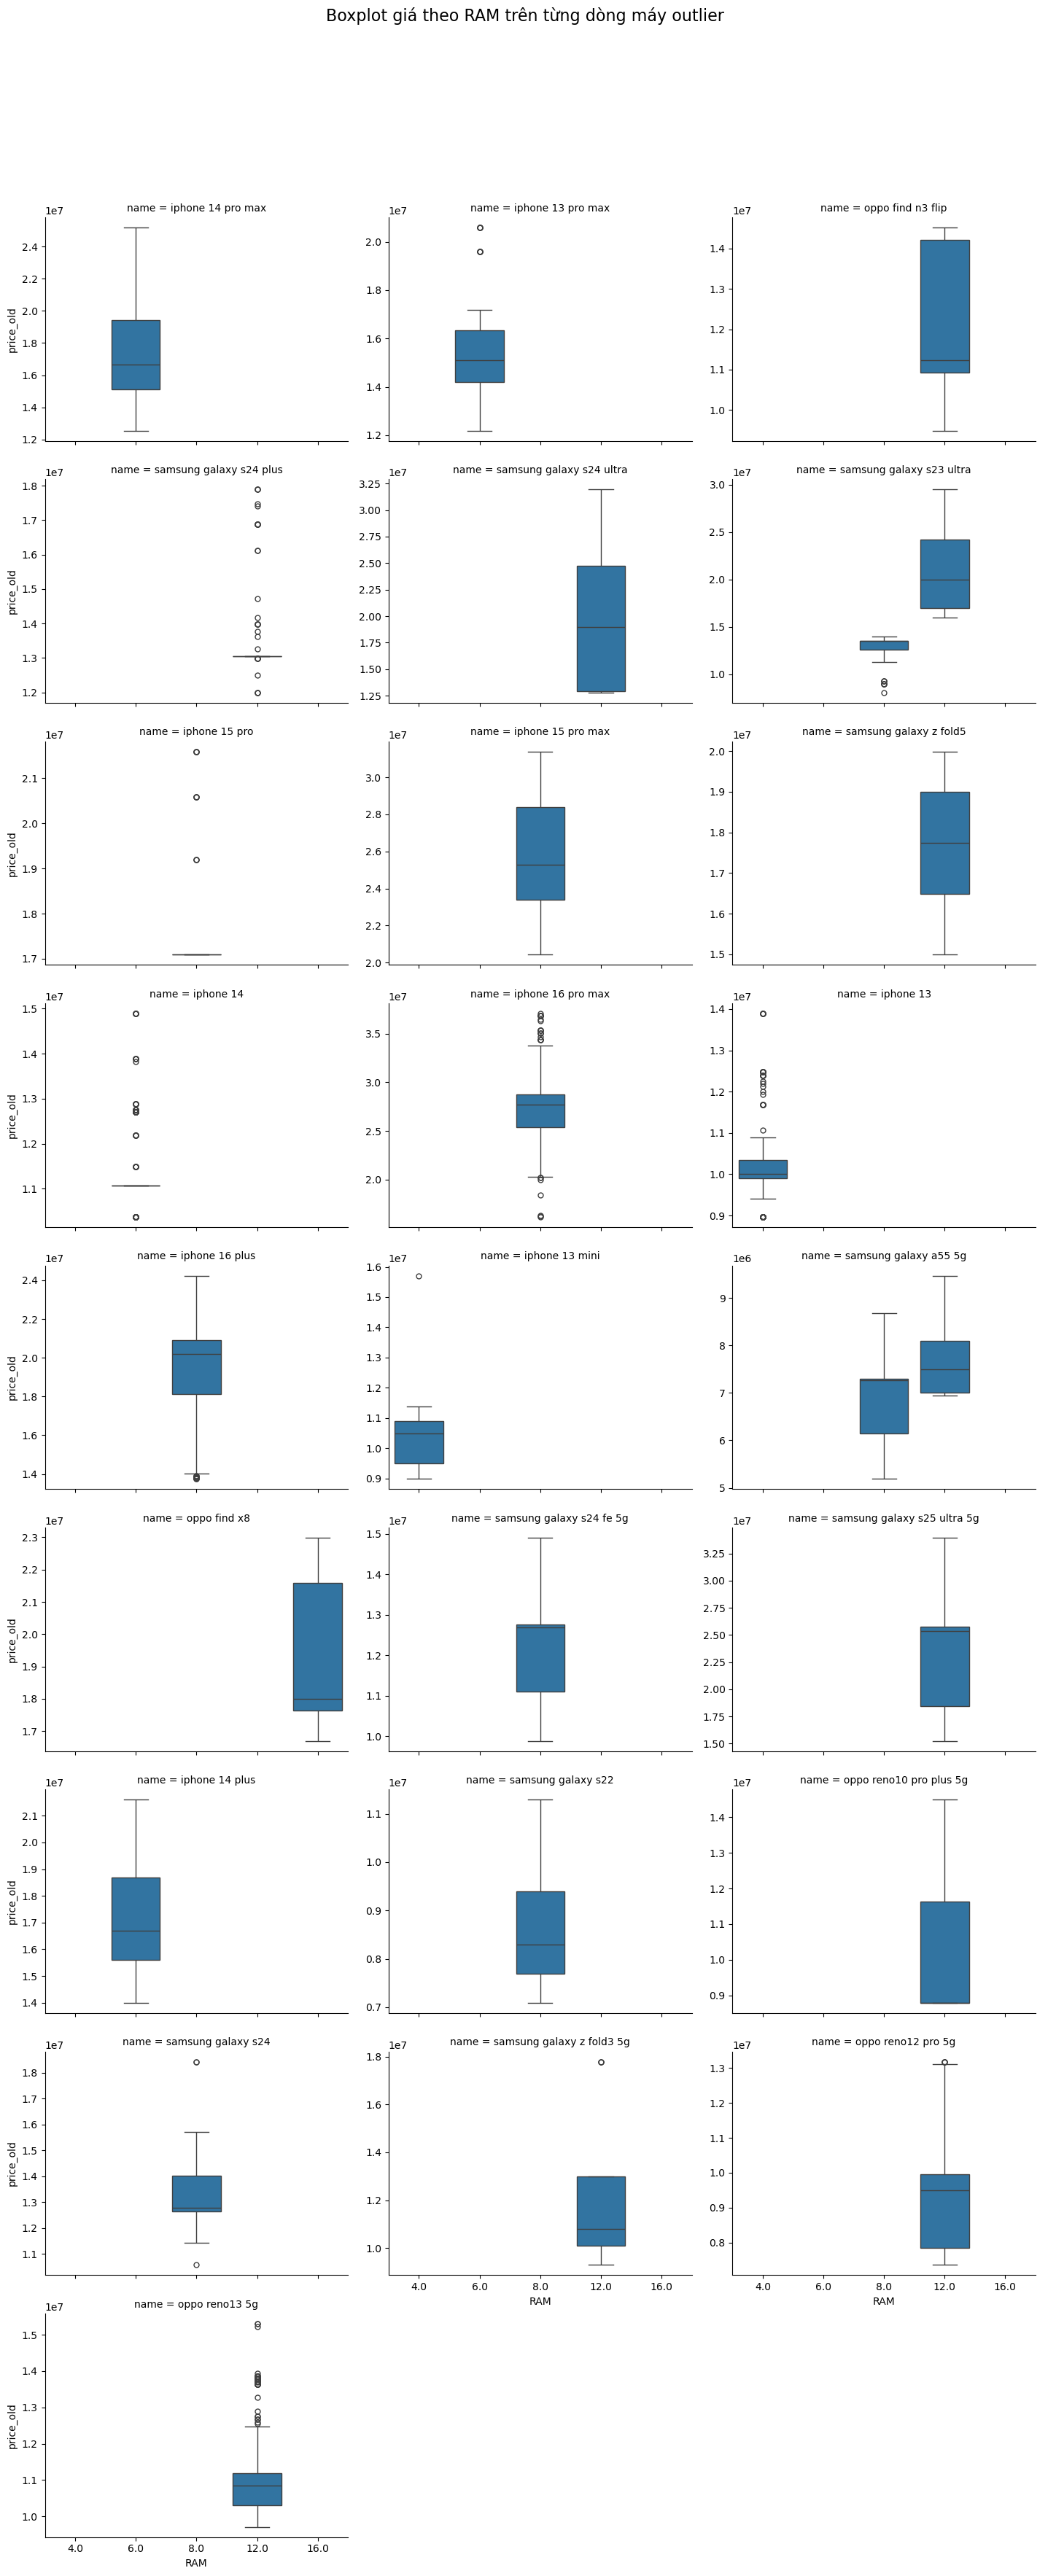

In [65]:
# Lọc các dòng máy là outlier
outlier_names = set(out['name'])
data_out = data[data['name'].isin(outlier_names)].reset_index(drop=True)

# Vẽ mỗi dòng máy là một biểu đồ boxplot riêng với RAM
g = sns.catplot(
    data=data_out,
    x='RAM',
    y='price_old',
    col='name',
    kind='box',
    col_wrap=3,      
    height=4,
    aspect=1.2,
    sharey=False     
)

# Tùy chỉnh tiêu đề chung
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Boxplot giá theo RAM trên từng dòng máy outlier", fontsize=16)

plt.show()

In [66]:

def detect_outliers(series):
    # Nếu nhóm quá nhỏ, không tính outlier
    if len(series) < 4:
        return pd.Series([False] * len(series), index=series.index)
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Đánh dấu là outlier nếu giá trị nhỏ hơn lower_bound hoặc lớn hơn upper_bound
    return (series < lower_bound) | (series > upper_bound)
# Tạo cột is_outlier_RAM cho từng nhóm theo 'name' và 'RAM'
data['is_outlier_RAM'] = data.groupby(['name', 'RAM'])['price_old'].transform(detect_outliers)

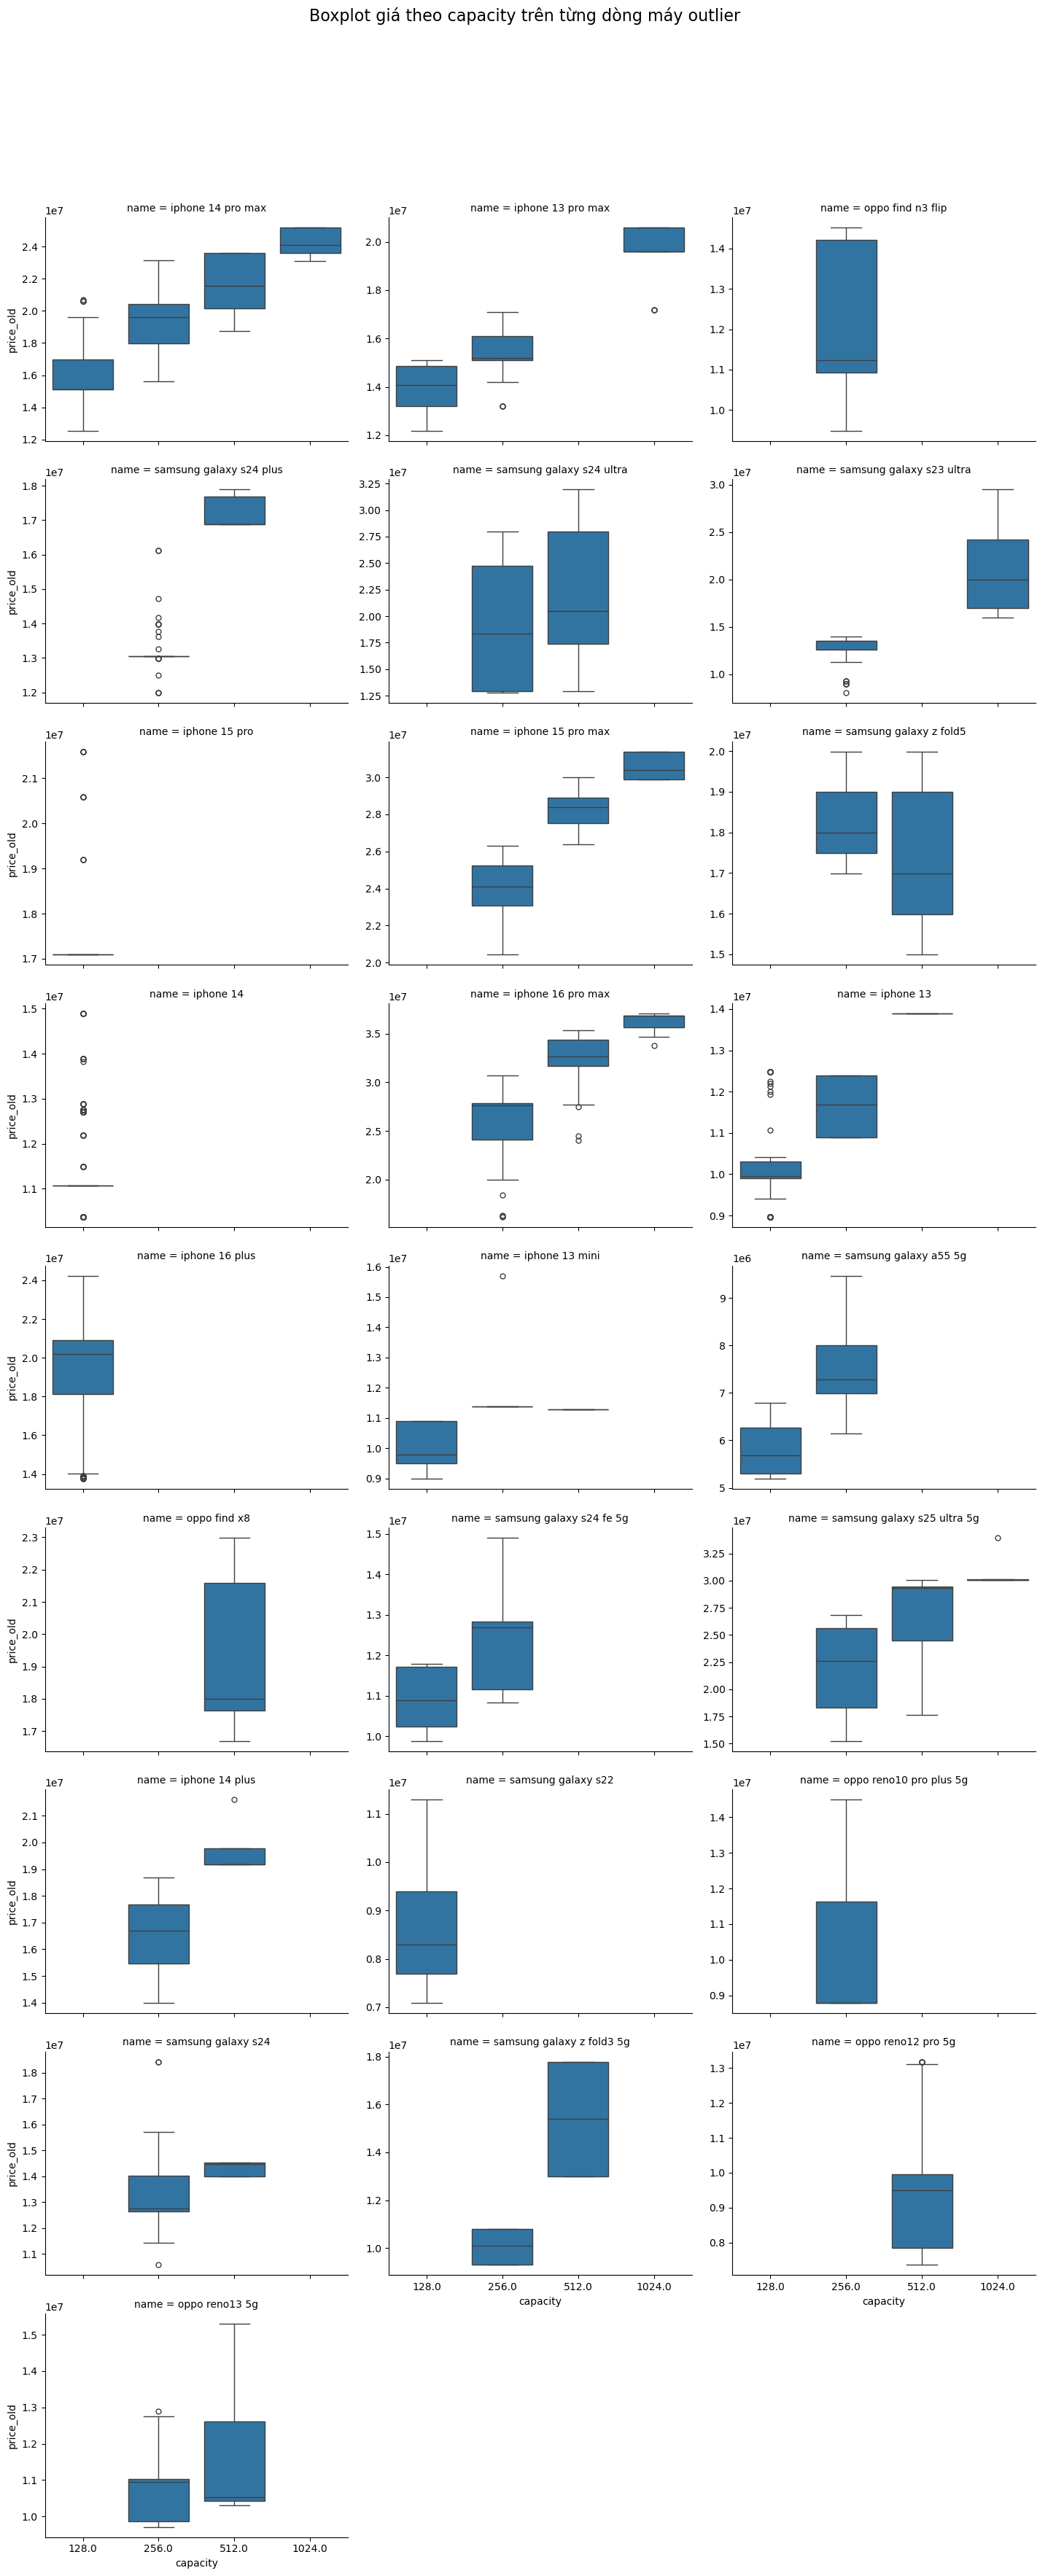

In [67]:
# Vẽ mỗi dòng máy là một biểu đồ boxplot riêng với capacity
g = sns.catplot(
    data=data_out,    
    x='capacity',     
    y='price_old',
    col='name',
    kind='box',
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=False
)

# Tùy chỉnh tiêu đề chung
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Boxplot giá theo capacity trên từng dòng máy outlier", fontsize=16)

plt.show()

In [68]:
def detect_outliers(series):
    # Nếu số lượng mẫu không đủ thì không xác định outlier
    if len(series) < 4:
        return pd.Series([False] * len(series), index=series.index)
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (series < lower_bound) | (series > upper_bound)
data['is_outlier_capacity'] = data.groupby(['name', 'capacity'])['price_old'].transform(detect_outliers)

In [69]:
data = data[~(data['is_outlier_RAM'] & data['is_outlier_capacity'])]
data = data.drop(columns=['is_outlier_RAM', 'is_outlier_capacity'])

# Lưu dữ liệu đã qua xử lí

In [70]:
# Xuất DataFrame ra file CSV
data.to_csv('tidy_data.csv', index=False, encoding='utf-8-sig')